# Webtask Demo: Google Search

This notebook demonstrates automated Google search using Webtask with low-level imperative control.

## 1. Setup

Install dependencies and import required libraries.

In [1]:
!pip install -e .

Obtaining file:///Users/stevewang/Github/web-auto/webtask/examples

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
ERROR: file:///Users/stevewang/Github/web-auto/webtask/examples does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [2]:
from dotenv import load_dotenv
from IPython.display import Image, display

# Load environment variables from .env file
load_dotenv()

True

## 2. Initialize Webtask Agent

Create a Webtask instance and configure the LLM.

In [3]:
from webtask import Webtask
from webtask.integrations.llm.openai import OpenAILLM

wt = Webtask()
# OpenAILLM will automatically read OPENAI_API_KEY from environment
llm = OpenAILLM.create(model="gpt-4.1", temperature=0.3)

/Users/stevewang/Github/web-auto/webtask/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Create agent with default settings
agent = await wt.create_agent(llm=llm)

## 3. Navigate to Google

Navigate to Google's homepage.

In [5]:
await agent.navigate("google.com")

## 4. Search Query

Type the search query into the input field.

In [6]:
input_field = await agent.select("google search input")
await input_field.type("what is the capital of france?")
await agent.wait(2)

## 5. Final Results

Capture the search results page.

Search Results:


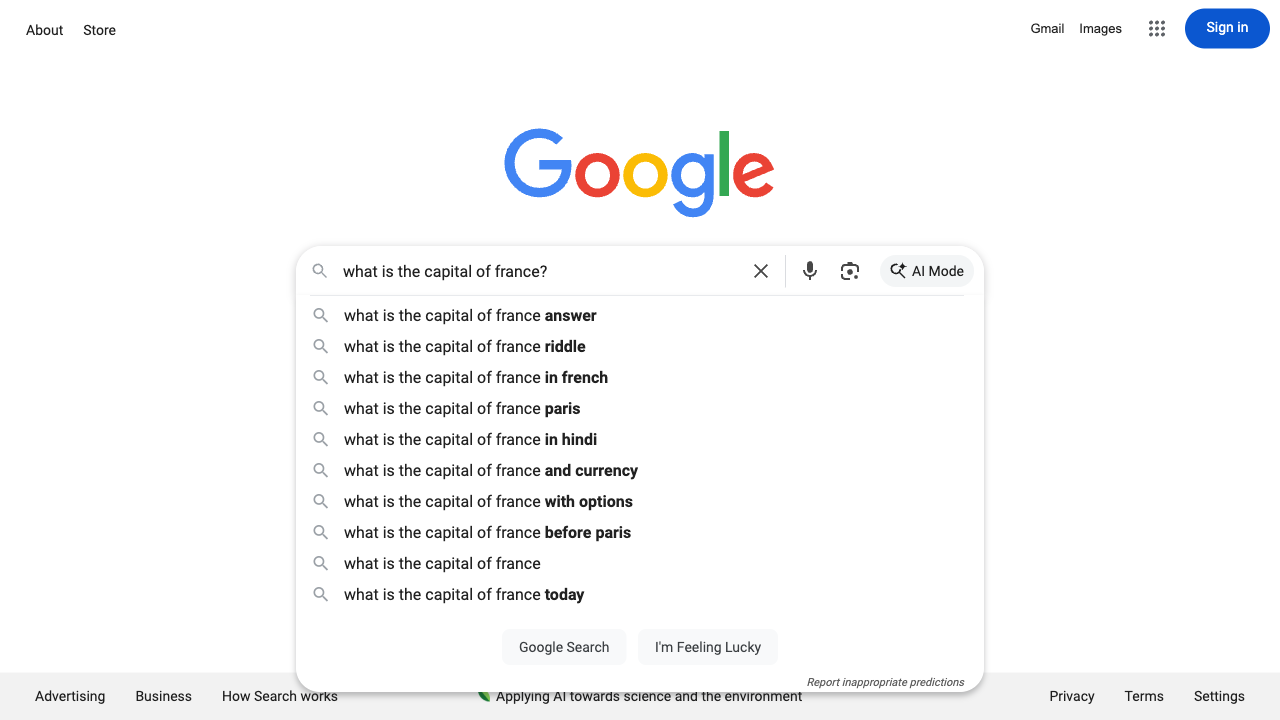

In [7]:
# Take screenshot of search results
print("Search Results:")
await agent.screenshot("search_results.png")
display(Image(filename="search_results.png", width=800))